<a href="https://colab.research.google.com/github/eomtaehyeon/Hongong_ML-DL-/blob/main/Chapter_4_%EC%97%84%ED%83%9C%ED%98%84.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4장 다양한 분류 알고리즘
- 럭키백의 확률을 계산하라!

# 4 - 1 로지스틱 회귀
- 로지스틱 회귀 알고리즘을 배우고 이진 분류 문제에서 클래스 확률을 예측.

## 럭키백의 확률

### 데이터 준비

In [ ]:
import pandas as pd

fish = pd.read_csv('https://bit.ly/fish_csv_data')
fish.head()

In [ ]:
# 어떤 종류의 생선이 있는지 unique() 함수 이용
print(pd.unique(fish['Species']))

['Bream' 'Roach' 'Whitefish' 'Parkki' 'Perch' 'Pike' 'Smelt']


### 데이터 변환

- input 배열로 변환
- 독립변수

In [ ]:
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
print(fish_input[:5])

[[242.      25.4     30.      11.52     4.02  ]
 [290.      26.3     31.2     12.48     4.3056]
 [340.      26.5     31.1     12.3778   4.6961]
 [363.      29.      33.5     12.73     4.4555]
 [430.      29.      34.      12.444    5.134 ]]


- target 배열로 변환
- 종속변수

In [ ]:
fish_target = fish['Species'].to_numpy()

### 훈련 데이터와 테스트 데이터 

In [ ]:
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

- 표준화 전처리
  + 무게, 길이 등 단위가 달라서 통일이 필요

In [ ]:
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

In [ ]:
# 확인
# print(train_input[:5])
# print(train_scaled[:5])
# print(test_scaled[:5])

### k-최근접 이웃 분류기의 확률 예측

In [ ]:
from sklearn.neighbors import KNeighborsClassifier

kn = KNeighborsClassifier(n_neighbors=3)
kn.fit(train_scaled, train_target)

print(kn.score(train_scaled, train_target))
print(kn.score(test_scaled, test_target))

0.8907563025210085
0.85


- 다중분류(multi-class classification) : 타깃 데이터에 2개 이상의 클래스가 포함
- 사이킷런에서는 문자열로 된 타깃값을 그대로 사용가능
  + 주의 : 타깃값 순서가 알파벳 순으로 매겨짐.
  + pd.unique(fish['Species'])로 출력했던 순서와 다름.
- 타깃값은 classes_ 속성에 저장.


In [ ]:
print(kn.classes_)

['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 테스트 세트에 샘플의 타깃값 예측
print(kn.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Perch' 'Perch']


- predict_proba() 메서드로 클래스별 확률값을 반환.
- 넘파이 round() 함수는 기본 소수점 첫째 자리에서 반올림.
- decimals 매개변수로 유지할 소수점 아래 자릿수 지정 가능.


In [ ]:
import numpy as np
proba = kn.predict_proba(test_scaled[:5])
print(np.round(proba, decimals = 4))
print(kn.classes_)

[[0.     0.     1.     0.     0.     0.     0.    ]
 [0.     0.     0.     0.     0.     1.     0.    ]
 [0.     0.     0.     1.     0.     0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]
 [0.     0.     0.6667 0.     0.3333 0.     0.    ]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


In [ ]:
# 네 번째 샘플의 클래스 확인
distances, indexes = kn.kneighbors(test_scaled[3:4])
print(train_target[indexes])

[['Roach' 'Perch' 'Perch']]


## **로지스틱 회귀**
- 로지스틱 회귀
- 기초 통계로도 활용 (의학통계)
- 머신러닝 분류모형의 기초 모형인데, 성능이 생각보다 나쁘지 않음
  + 데이터셋, 수치 데이터 기반
- 딥러닝 : 초기모형에 해당됨.
- reference : https://www.youtube.com/watch?v=zASrGSHoqL4
- z = a * (Weight) + b * (Length) + c * (Diagonal) + d * (Height) + e * (Width) + f
  + 시그모이드 함수 이용 

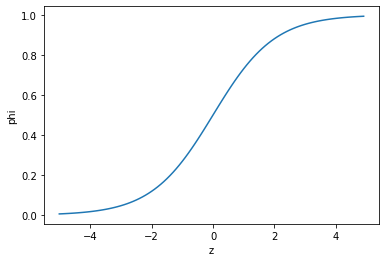

In [ ]:
# 시그모이드 함수 그래프
import numpy as np
import matplotlib.pyplot as plt
fig, ax = plt.subplots()
z = np.arange(-5, 5, 0.1)
phi = 1 / (1 + np.exp(-z))
ax.plot(z, phi)
ax.set_xlabel('z')
ax.set_ylabel('phi')
plt.show()

### 로지스틱 회귀로 이진 분류 수행

In [ ]:
# 넘파이 배열 행 선택하기
char_arr = np.array(['A','B','C','D','E'])
print(char_arr[[True, False, True, False, False]])

['A' 'C']


In [ ]:
# 도미와 빙어에 대한 행만 고름
bream_smelt_indexes = (train_target == 'Bream') | (train_target == 'Smelt')
train_bream_smelt = train_scaled[bream_smelt_indexes]
target_bream_smelt = train_target[bream_smelt_indexes]

- bream_smelt_indexes 배열은 도미와 빙어일경우 True 아니면 False
- LogsisticRegression 클래스에 훈련

In [ ]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression()
lr.fit(train_bream_smelt, target_bream_smelt)

LogisticRegression()

In [ ]:
# 모델을 사용해 처음 5개 샘플을 예측
print(lr.predict(train_bream_smelt[:5]))

['Bream' 'Smelt' 'Bream' 'Bream' 'Bream']


In [ ]:
# train_bream_smelt에서 처음 5개 샘플 예측 확률
print(lr.predict_proba(train_bream_smelt[:5]))
print(lr.classes_)

[[0.99759855 0.00240145]
 [0.02735183 0.97264817]
 [0.99486072 0.00513928]
 [0.98584202 0.01415798]
 [0.99767269 0.00232731]]
['Bream' 'Smelt']


- 첫 번째 열이 음성클래스(0)에 대한 확률
- 두 번째 열이 양성클래스(1)에 대한 확률
- 빙어(smelt)가 양성 클래스

- 로지스틱 회귀가 학습한 계수를 확인

In [ ]:
print(lr.coef_, lr.intercept_)

[[-0.4037798  -0.57620209 -0.66280298 -1.01290277 -0.73168947]] [-2.16155132]


- z = -0.4037798  * (Weight) -0.57620209 * (Length) -0.66280298 * (Diagonal) -1.01290277 * (Height) -0.73168947 * (Width) -2.16155132

In [ ]:
# decision_function() 메서드로 z 값 출력
decisions = lr.decision_function(train_bream_smelt[:5])
print(decisions)

[-6.02927744  3.57123907 -5.26568906 -4.24321775 -6.0607117 ]


- z 값을 시그모이드 함수에 통과시키면 확률을 얻음.
- 사이파이 라이브러리 expit()를 이용.

In [ ]:
from scipy.special import expit
print(expit(decisions))

[0.00240145 0.97264817 0.00513928 0.01415798 0.00232731]


- 출력된 값이 predict_proba() 메서드 출력의 두 번째 열의 값과 동일.
- decision_function() 메서드는 양성 클래스에 대한 z값을 반환

### 로지스틱 회귀로 다중 분류 수행
- LogisticRegression 클래스를 사용해 7개 생선을 분류
- vs 이진분류

In [ ]:
lr = LogisticRegression(C=20, max_iter=1000)
lr.fit(train_scaled, train_target)
print(lr.score(train_scaled, train_target))
print(lr.score(test_scaled, test_target))

0.9327731092436975
0.925


- 훈련 세트와 테스트 세트에 대한 점수가 높다.
- 과대/과소로 치우지지 않음

In [ ]:
# 테스트 세트의 처음 5개 샘플 예측
print(lr.predict(test_scaled[:5]))

['Perch' 'Smelt' 'Pike' 'Roach' 'Perch']


In [ ]:
# 테스트 세트의 처음 5개 샘플 예측확률
proba = lr.predict_proba(test_scaled[:5])
print(np.round(proba, decimals= 3))
print(lr.classes_)

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]
['Bream' 'Parkki' 'Perch' 'Pike' 'Roach' 'Smelt' 'Whitefish']


- 다중 분류일 경우 선형 방정식은 어떤 모습?

In [ ]:
print(lr.coef_.shape, lr.intercept_.shape)

(7, 5) (7,)


- coef_ 행열이 (7,5) intercept_ 행도 7개
- z식이 7개
- 확률 계산 : 소프트맥스 함수를 사용.
  + 소프트맥스 함수는 여러 개의 선형 방정식의 출력값을 0~1 사이로 압축하고 전체 합이 1.
  + 이를 위해 지수 함수를 사용하기 때문에 정규화된 지수 함수라고도 부름.
  + reference : https://gooopy.tistory.com/53

In [ ]:
# decision_function() 메서드로  z1~z7까지 값

decision = lr.decision_function(test_scaled[:5])
print(np.round(decision, decimals=2))

[[ -6.5    1.03   5.16  -2.73   3.34   0.33  -0.63]
 [-10.86   1.93   4.77  -2.4    2.98   7.84  -4.26]
 [ -4.34  -6.23   3.17   6.49   2.36   2.42  -3.87]
 [ -0.68   0.45   2.65  -1.19   3.26  -5.75   1.26]
 [ -6.4   -1.99   5.82  -0.11   3.5   -0.11  -0.71]]


In [ ]:
# scipy.special 이욯해 확률
from scipy.special import softmax
proba = softmax(decision, axis=1)
print(np.round(proba, decimals=3))

[[0.    0.014 0.841 0.    0.136 0.007 0.003]
 [0.    0.003 0.044 0.    0.007 0.946 0.   ]
 [0.    0.    0.034 0.935 0.015 0.016 0.   ]
 [0.011 0.034 0.306 0.007 0.567 0.    0.076]
 [0.    0.    0.904 0.002 0.089 0.002 0.001]]


- proba 배열과 일치.


# 4 - 2 확률적 경사 하강법
- 경사 하강법 알고리즘을 이해하고 대량의 데이터에서 분류 모델을 훈련하는 방법을 배움.

## 점진적인 학습
- 점진적 학습 알고리즘 : 확률적 경사 하강법


### 확률적 경사 하강법
- 훈련세트에서 랜덤하게 하나의 샘플을 고르는 것.
- 에포크(epoch) : 훈련세트를 한 번 모두 사용하는 과정.
- 미니배치 경사 하강법 : 여러 개의 샘플을 사용해 경사 하강법.
- 배치 경사 하강법 : 전체 샘플을 사용.

### 손실 함수
- 손실함수(loss function)는 머신러닝 알고리즘이 오차를 측정하는 기준. 샘플 하나에 대한 손실을 정의
- 비용 함수(cost function)는 손실 함수의 다른 말. 훈련 세트에 있는 모든 샘플에 대한 손실 함수의 합.

### 로지스틱 손실 함수
- 로지스틱 손실함수(logistic loss function) : 예측 확률에 로그함수를 적용
  + 확률이 0, 1에서 멀어질수록 손실은 아주 큰 양수
  + 타깃 = - 1 -log(예측확률), 타깃 = 0 -log(1-예측확률)
  + 이진 크로스엔트로피 손실 함수라고도 함.
- 다중 분류에서 손실 함수를 크로스엔트로피 손실 함수라고 부름.


## SGDClassifier


In [ ]:
# 데이터 불러오기
import pandas as pd
fish = pd.read_csv('https://bit.ly/fish_csv_data')

# Species 열을 제외한 나머지 5개 입력데이터로 사용.
# Species 열은 타깃 데이터.
fish_input = fish[['Weight', 'Length','Diagonal','Height','Width']].to_numpy()
fish_target = fish['Species'].to_numpy()

# 훈련세트와 테스트세트로 나눔.
from sklearn.model_selection import train_test_split
train_input, test_input, train_target, test_target = train_test_split(
    fish_input, fish_target, random_state=42
)

# 표준화 전처리.
from sklearn.preprocessing import StandardScaler
ss = StandardScaler()
ss.fit(train_input)
train_scaled = ss.transform(train_input)
test_scaled = ss.transform(test_input)

# SGDClassifier 사용.
from sklearn.linear_model import SGDClassifier

# max_iter = 수행할 에포크 횟수 지정
sc = SGDClassifier(loss='log', max_iter=10, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.773109243697479
0.775


/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_stochastic_gradient.py:700: ConvergenceWarning: Maximum number of iteration reached before convergence. Consider increasing max_iter to improve the fit.
  ConvergenceWarning,


- 훈련 세트와 테스트 세트 정확도가 낮다.

In [ ]:
# partial_fit() 메서드를 이용 : 모델을 추가로 훈련
sc.partial_fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))

0.8151260504201681
0.85


## 에포크와 과대 / 과소적합
- 적은 에포크 횟수 동안에 훈련한 모델은 훈련세트와 테스트세트에 잘 맞이 않는 과소적합된 모델일 가능성이 높다.
- 많은 에포크 횟수 동안에 훈련한 모델은 훈련 세트에 너무 잘 맞아 테스트 세트에는 오히려 점수가 나쁜 과대적합된 모델일 가능성이 높다.
- 조기 종료 : 과대적합이 시작하기 전에 훈련을 멈추는 것

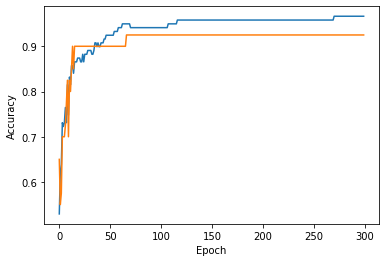

In [ ]:
import numpy as np
sc = SGDClassifier(loss='log', random_state=42)
train_score = []
test_score = []
classes = np.unique(train_target)

# 300번의 에포크 동안 훈련을 반복 진행
for _ in range(0, 300):
  sc.partial_fit(train_scaled, train_target, classes=classes)
  train_score.append(sc.score(train_scaled, train_target))
  test_score.append(sc.score(test_scaled, test_target))

# 300번 에포크 그래프
import matplotlib.pyplot as plt

fig, ax = plt.subplots()
ax.plot(train_score)
ax.plot(test_score)
ax.set_xlabel("Epoch")
ax.set_ylabel("Accuracy")
plt.show()

- 100번째 에포크 이후 훈련세트와 테스트세트가 벌어짐.

In [ ]:
# 반복 횟수를 100에 맞춘 모델.
# toㅣ= None max_iter 동안 무조건 반복.
sc = SGDClassifier(loss='log', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.957983193277311
0.925


- 훈련세트와 테스트세트에서의 정확도  점수가 비교적 높게 나옴.
- SGDRegressor : 확률적 경사 하강법을 사용한 분류 모델
  + 확률적 경사 하강법을 사용한 회귀 알고리즘을 제공.

- loss 매개변수의 기본값은 'hinge'.
- 힌지 손실 : 서포트 벡터 머신이라고 불리는 또 다른 머신러닝 알고리즘을 위한 손실함수.
- SGDClassifier가 여러 종류의 손실 함수를 loss 매개변수에 지정하여 다양한 머신러닝 알고리즘을 지원

In [ ]:
# 힌지 손실을 사용해 모델 훈련
sc = SGDClassifier(loss='hinge', max_iter=100, tol=None, random_state=42)
sc.fit(train_scaled, train_target)
print(sc.score(train_scaled, train_target))
print(sc.score(test_scaled, test_target))


0.9495798319327731
0.925


## 점진적 학습을 위한 확률적 경사 하강법(문제해결과정)
- 훈련을 반복할수록 모델이 훈련 세트에 점점 더 잘 막게 되어 어느 순간 과대적합되고 테스트세트의 정확도가 줄어듬.
- 데이터를 한 번에 모두 컴퓨터 메모리에 읽을 수 없기 때문에
--> 데이터를 조금씩 사용해 점진적으로 학습하는 방법이 필요.
